In [1]:
from google.colab import files
uploaded = files.upload()

Saving SAB.csv to SAB.csv


In [2]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("SAB.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"242,000","236,300","246,000","236,300",31.25K,0.83%
1,3/4/2019,"242,000","240,000","245,500","239,000",44.09K,0.00%
2,3/5/2019,"243,500","244,500","244,800","240,100",10.22K,0.62%
3,3/6/2019,"243,900","240,400","245,000","240,000",22.91K,0.16%
4,3/7/2019,"241,100","242,000","242,900","240,500",25.34K,-1.15%
...,...,...,...,...,...,...,...
1310,5/29/2024,"60,500","61,000","61,300","60,300",1.47M,-0.82%
1311,5/30/2024,"59,300","59,600","60,000","58,300",1.67M,-1.98%
1312,5/31/2024,"58,300","59,300","59,300","58,300",1.49M,-1.69%
1313,6/3/2024,"59,400","59,000","60,100","58,700",1.13M,1.89%


In [4]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,242000.0,"236,300","246,000","236,300",31.25K,0.83%
1,2019-03-04,242000.0,"240,000","245,500","239,000",44.09K,0.00%
2,2019-03-05,243500.0,"244,500","244,800","240,100",10.22K,0.62%
3,2019-03-06,243900.0,"240,400","245,000","240,000",22.91K,0.16%
4,2019-03-07,241100.0,"242,000","242,900","240,500",25.34K,-1.15%
...,...,...,...,...,...,...,...
1310,2024-05-29,60500.0,"61,000","61,300","60,300",1.47M,-0.82%
1311,2024-05-30,59300.0,"59,600","60,000","58,300",1.67M,-1.98%
1312,2024-05-31,58300.0,"59,300","59,300","58,300",1.49M,-1.69%
1313,2024-06-03,59400.0,"59,000","60,100","58,700",1.13M,1.89%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1315 non-null   datetime64[ns]
 1   Price     1315 non-null   float64       
 2   Open      1315 non-null   object        
 3   High      1315 non-null   object        
 4   Low       1315 non-null   object        
 5   Vol.      1315 non-null   object        
 6   Change %  1315 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.0+ KB


<h1>Split the data into training, testing arcording to 7:3

In [6]:
# Split the data into training, testing arcording to 7:3
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [7]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.3 MB/s eta 0:00:00


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17972.952, Time=2.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17965.756, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17967.204, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17967.212, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17965.190, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17969.151, Time=0.78 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.271 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [10]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873.
 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873.
 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873.]


In [11]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873.
 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873.
 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873.]
Predicted closing prices for the next 90 days:
[87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873.
 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873.
 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873. 87873.]


In [12]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 19230.52628347026
Testing MAE: 15671.60506329114
Testing MAPE: 24.7662237129577


In [13]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

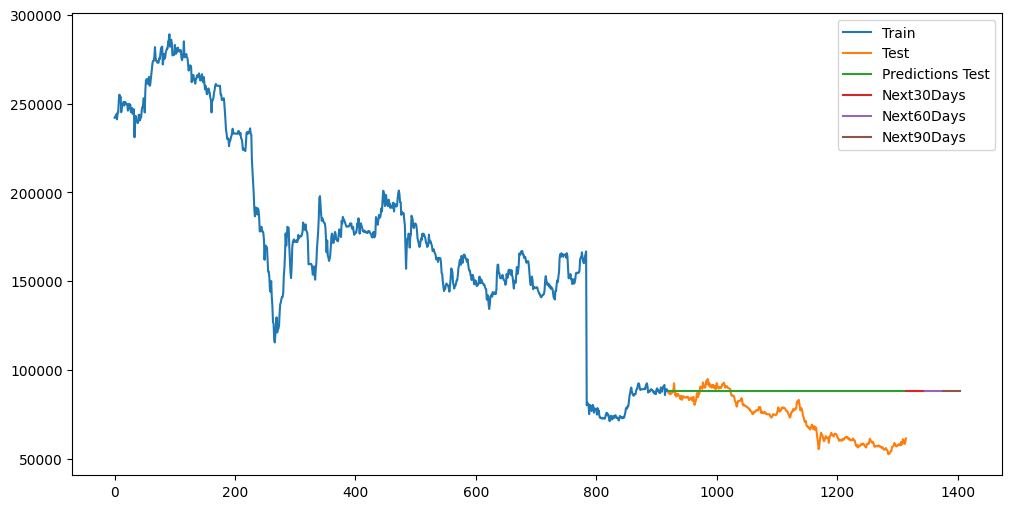

In [14]:
# Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predictions Test','Next30Days','Next60Days','Next90Days'])
plt.show()

<h1># Split the data into training, testing arcording to 8:2

In [15]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [16]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20426.261, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20419.104, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20420.516, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20420.524, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20418.689, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20422.480, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.879 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [18]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828.
 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828.
 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828.]


In [19]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828.
 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828.
 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828.]
Predicted closing prices for the next 90 days:
[78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828.
 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828.
 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828. 78828.]


In [20]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100


print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 15338.05330286973
Testing MAE: 12838.619771863117
Testing MAPE: 21.358126715433382


In [21]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

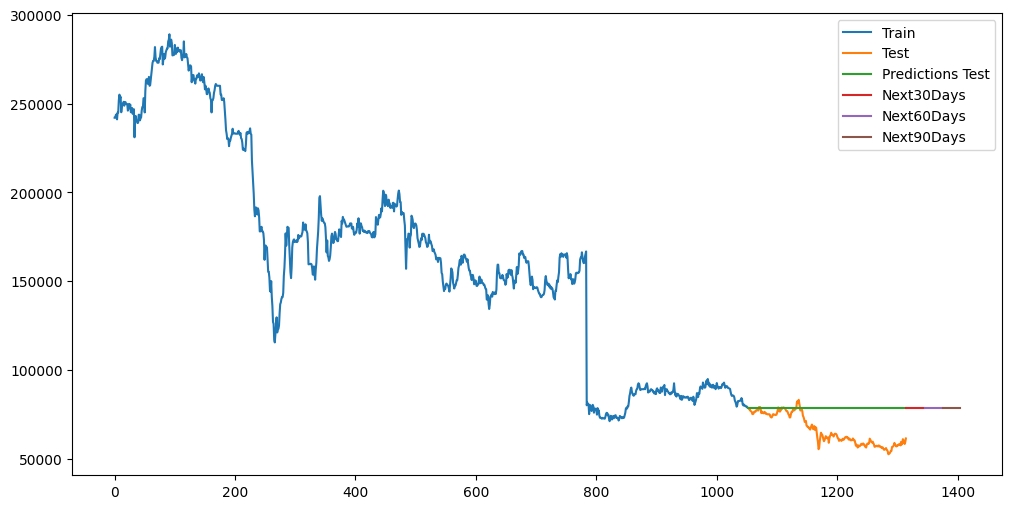

In [22]:
# 8.Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predictions Test','Next30Days','Next60Days','Next90Days'])
plt.show()

<h1># Split the data into training, testing arcording to 9:1

In [23]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [24]:
#  Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22844.747, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22837.764, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22839.014, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22839.023, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22837.668, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22840.941, Time=0.89 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.011 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [25]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [26]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195.
 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195.
 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195.]


In [27]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195.
 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195.
 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195.]
Predicted closing prices for the next 90 days:
[62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195.
 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195.
 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195. 62195.]


In [28]:
# 7. Tính RMSE, MSE, MAPE

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 4225.886084239576
Testing MAE: 3554.242424242424
Testing MAPE: 6.215135671791399


In [29]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

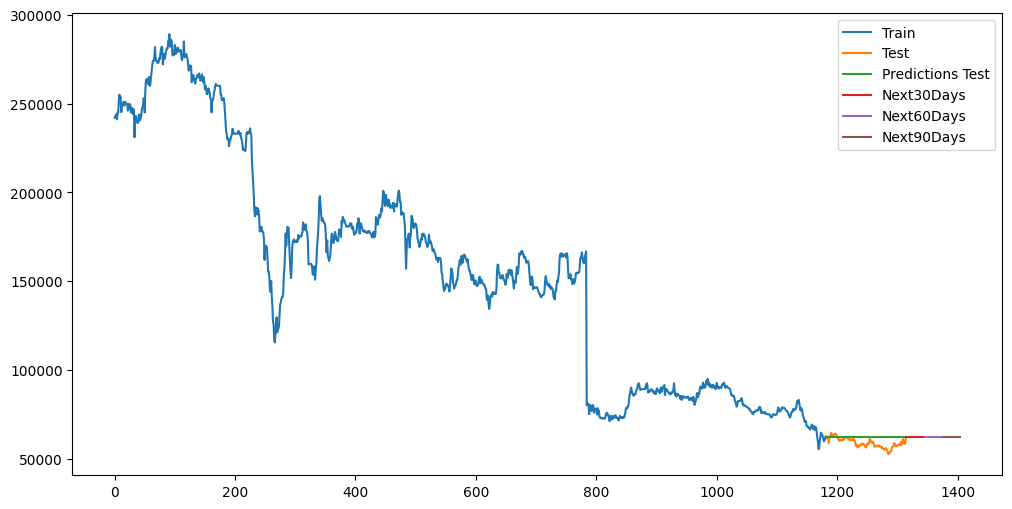

In [30]:
# Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predictions Test','Next30Days','Next60Days','Next90Days'])
plt.show()